##Imports for our exploratory data analysis

In [1]:
import pandas as pd
import seaborn as sns
import operator
import string
import re
from collections import Iterable
from matplotlib import pyplot as plt
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

##Read in our data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/danielmoore19/COVID-Chat-Bot/master/covid_data/covid_df.csv')

##Next is a series of functions to process our data. One process will not lemmatize, but will remove all alphanumerics. The other will lemmatize, but leave our numerics since our project is on COVID-19. 'Twould be a shame to lose that term, but could reveal interesting analytics. Thus, two different processes.

##It will also create our functions for corpus statistics and eventual word clouds. As a future note, it would have been well played to create functions for some of my plots and statistics.

In [0]:
def preprocess_no_lemm(docs):
  cleaned_docs = []

  for doc in docs:
    tokens = word_tokenize(doc)
    doc_list = []

    for token in tokens:
      if token.lower() not in stopwords.words('english') and token.lower().isalpha():
        doc_list.append(token.lower())

    docs_joined = ' '.join(doc_list)
    cleaned_docs.append(docs_joined)

  return cleaned_docs

In [0]:
def preprocess_lemm(docs):
  lemmer = WordNetLemmatizer()
  prepd = []

  for doc in docs:
    tokenized = word_tokenize(doc)

    cleaned = [lemmer.lemmatize(token.lower(), get_wordnet_pos(token))
               for token in tokenized
               if token.lower() not in stopwords.words('english')
               if token.lower() not in string.punctuation]
    cleaned2 = [re.sub('[^A-Za-z0-9]+', '', token).strip() for token in cleaned
                if len(token)>1]

    untokenized = ' '.join(cleaned2)
    prepd.append(untokenized)

  return prepd

In [0]:
def q_stats(corpus):
  print(f'There are {len(corpus)} questions.')
  print(f'There are {(sum([len(question.split()) for question in corpus]))/(len(corpus)):.2f} words per question.')
  print(f'There are {(sum([len(question) for question in corpus]))/(len(corpus)):.2f} characters per question.')
  print(f'There are {sum([len(question.split()) for question in corpus])} words.')
  print(f'There are {len(set(q_string.split()))} unique words.')
  print(f'There are {sum([len(question) for question in corpus])} characters.')
  print(f'There are {(sum([len(question) for question in corpus]))/(sum([len(question.split()) for question in corpus])):.2f} characters per word.')
  print(f'The lexical diversity within the questions is {(len(set(q_string.split())))/(sum([len(question.split()) for question in corpus])):.4f}.')


In [0]:
def a_stats(corpus):
  print(f'There are {len(corpus)} answers.')
  print(f'There are {(sum([len(answer.split()) for answer in corpus]))/(len(corpus)):.2f} words per answer.')
  print(f'There are {(sum([len(answer) for answer in corpus]))/(len(corpus)):.2f} characters per answer.')
  print(f'There are {sum([len(answer.split()) for answer in corpus])} words.')
  print(f'There are {len(set(a_string.split()))} unique words.')
  print(f'There are {sum([len(answer) for answer in corpus])} characters.')
  print(f'There are {(sum([len(answer) for answer in corpus]))/(sum([len(answer.split()) for answer in corpus])):.2f} characters per word.')
  print(f'The lexical diversity within the answers is {(len(set(a_string.split())))/(sum([len(answer.split()) for answer in corpus])):.4f}.')

In [0]:
def get_wordnet_pos(word):
  #Map POS tag to first character lemmatize() accepts
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
              "N": wordnet.NOUN,
              "V": wordnet.VERB,
              "R": wordnet.ADV}

  return tag_dict.get(tag, wordnet.NOUN)

In [0]:
def word_cloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS, 
                    colormap=colormap, 
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12, 10))
  plt.imshow(cloud)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

In [0]:
# def flatten(lis):
#      for item in lis:
#          if isinstance(item, Iterable) and not isinstance(item, str):
#              for x in flatten(item):
#                  yield x
#          else:        
#              yield item

In [0]:
# for sentence in questions:
#   tokenize = word_tokenize(sentence)
#   pos = nltk.pos_tag(tokenize)
#   tagged_list.append(pos)

  # for token in tokenize:
  #   if token in wordnet.ADJ:
  #     adjectives.append(token)
  #   elif token in wordnet.ADV:
  #     adverbs.append(token)
  #   elif token in wordnet.VERB:
  #     verbs.append(token)
  #   else:
  #     print(token)


In [0]:
# def word_count(str):
#     counts = dict()
#     words = str.split()

#     for word in words:
#         if word in counts:
#             counts[word] += 1
#         else:
#             counts[word] = 1

#     return sorted(counts.items(), key=operator.itemgetter(1),reverse=True)

##Almost through the set up phase. Now we need ourvaribles with which to do the fun things: visualize.

##We will need raw lists, raw strings, tokenized and tagged, as well as clean for analysis and dirty for raw statistics. We will also need to have two sets for our two processes. This is one of the things for which I might should have written a function.

In [0]:
question_list = list(df['questions'])
answer_list = list(df['answers'])

In [0]:
q_string_prep = preprocess_no_lemm(question_list)
a_string_prep = preprocess_no_lemm(answer_list)

In [0]:
q_string_lemm_prep = preprocess_lemm(question_list)
a_string_lemm_prep = preprocess_lemm(answer_list)

In [0]:
q_string = " ".join(q_string_prep)
a_string = " ".join(a_string_prep)

In [51]:
q_string

'novel coronavirus disease called coronavirus disease might someone blame avoid individuals groups create stigma people help stop stigma related state case numbers sometimes differ posted cdc website cdc case numbers compare provided world health organization johns hopkins number cases previous days increase source virus virus spread seeing rise cases someone spread illness others someone quarantined spread illness others virus causes spread food including restaurant take refrigerated frozen packaged food get sick food warm weather stop outbreak community spread temperature kills virus causes mosquitoes ticks spread virus causes risk united states many cases reported united states help protect close contact someone cdc recommend use facemask face coverings prevent risk package products shipping china okay donate blood risk child becoming sick protect child infection symptoms different children adults children wear masks prepare children case outbreak community steps parents take protec

In [0]:
q_string_lemm = " ".join(q_string_lemm_prep)
a_string_lemm = " ".join(a_string_lemm_prep)

In [0]:
q_tokens = word_tokenize(q_string)
a_tokens = word_tokenize(a_string)

In [0]:
q_lemm_tokens = word_tokenize(q_string_lemm)
a_lemm_tokens = word_tokenize(a_string_lemm)

In [0]:
# variable = " ".join(question_list)
# tokenize = word_tokenize(variable)
tagged_q_list = nltk.pos_tag(q_tokens)
tagged_a_list = nltk.pos_tag(a_tokens)

In [0]:
tagged_q_list_lemm = nltk.pos_tag(q_lemm_tokens)
tagged_a_list_lemm = nltk.pos_tag(a_lemm_tokens)

In [0]:
tagged_questions = pd.DataFrame(tagged_q_list)
tagged_answers = pd.DataFrame(tagged_a_list)

In [0]:
tagged_lemm_q = pd.DataFrame(tagged_q_list_lemm)
tagged_lemm_a = pd.DataFrame(tagged_a_list_lemm)

##Our first visualization! POS tagged questions and answers. We can see that lemmatizing is having a huge effect on nouns, not so much other tags. In each set, we basically double our nouns once we lemmatize.

##Fotunately, we do see movement in the other parts of speech so that we know the lemmatization is working for every part of speech.

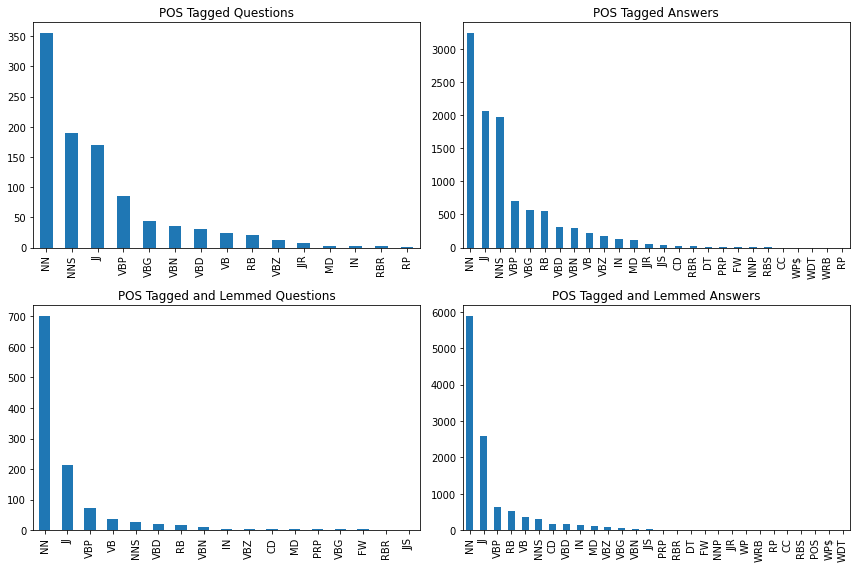

In [40]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
tagged_questions[1].value_counts().plot(kind='bar')
plt.title('POS Tagged Questions')

plt.subplot(2, 2, 2)
tagged_answers[1].value_counts().plot(kind='bar')
plt.title('POS Tagged Answers')

plt.subplot(2, 2, 3)
tagged_lemm_q[1].value_counts().plot(kind='bar')
plt.title('POS Tagged and Lemmed Questions')

plt.subplot(2, 2, 4)
tagged_lemm_a[1].value_counts().plot(kind='bar')
plt.title('POS Tagged and Lemmed Answers')

plt.tight_layout()

##Now we will look at some raw stats to get a better feel for what is happening within our words.

##We see that our lexical diversity scores are pretty low. This means we are going to run into some issues in helping our bot tell the difference between some questions.

##For our answers, it tells us the WHO, CDC, ECDC, and FDA are using a lot of similar language in their descriptions, prescriptions, and transcriptions. That is good for our populace who needs information that is not confusing.

In [41]:
q_stats(question_list)

There are 207 questions.
There are 11.30 words per question.
There are 65.25 characters per question.
There are 2339 words.
There are 446 unique words.
There are 13507 characters.
There are 5.77 characters per word.
The lexical diversity within the questions is 0.1907.


In [42]:
a_stats(answer_list)

There are 207 answers.
There are 95.41 words per answer.
There are 602.14 characters per answer.
There are 19749 words.
There are 2372 unique words.
There are 124644 characters.
There are 6.31 characters per word.
The lexical diversity within the answers is 0.1201.


##Next we will dig into the most used terms of our questions and answers, and how that changes between lemmatized and non-lemmatized data sets.

##Our non-lemmatized list, which is removing all alphanumerics, does not show the name of th virus among its most used terms. That is a problem. Users will certainly be referring to virus by name when asking our bot questions.

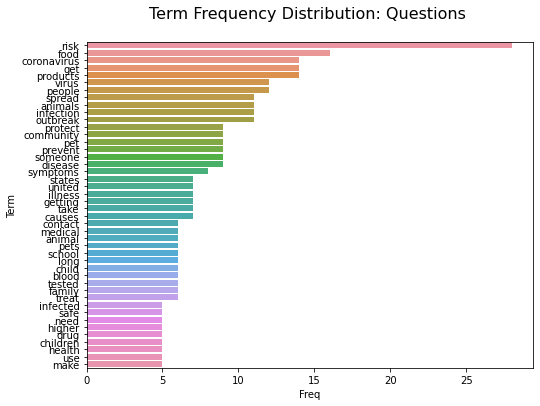

In [60]:
fdist = FreqDist(q_tokens)
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Term', 'Freq']
ordered = fdist_df.sort_values('Freq', ascending=False)
filter_q = ordered[ordered['Freq'] >= 5]

# filtered.plot(x='Term', y='Freq', kind='barh')
plt.figure(figsize=(8,6));
sns.barplot(data=filter_q, x='Freq', y='Term');
plt.title('Term Frequency Distribution: Questions \n', fontsize=16);

##Here with our lemmatized and keeping our numbers set, we see the word at the top we most wanted to see: the virus's name. However, we see the more formal 'coronavirus' has lost ground. From our exploration thus far, thinking about keywords, we really want to see COVID, Coronavirus, and Risk in our top 5. These are likely to get asked a lot, and we want our questions to have that help of being distinguishable.

##Additionally, these would help us create 'intention' sets if we decided to up the bot's abilities in the future.

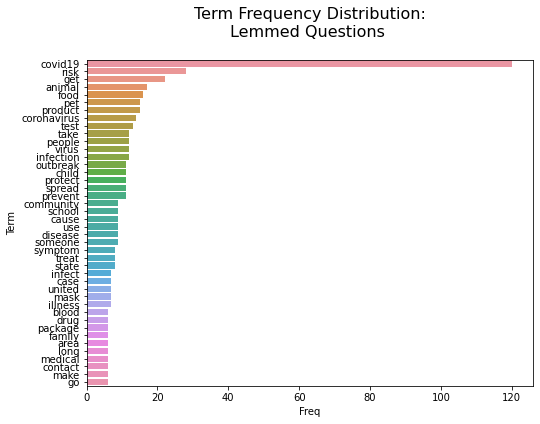

In [62]:
fdist = FreqDist(q_lemm_tokens)
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Term', 'Freq']
ordered = fdist_df.sort_values('Freq', ascending=False)
filter_q_lemm = ordered[ordered['Freq'] >= 6]

# filtered.plot(x='Term', y='Freq', kind='barh')
plt.figure(figsize=(8,6));
sns.barplot(data=filter_q_lemm, x='Freq', y='Term');
plt.title('Term Frequency Distribution:\nLemmed Questions \n', fontsize=16);

##We see our answers are doing similar things to our questions. It is not as important in terms of the user side of things, but it likely means we have some repeat questions and answers in our data base. Computationally--and storage wise--if our bot and its data set were scaled up, these are things we would look at to save time and space.

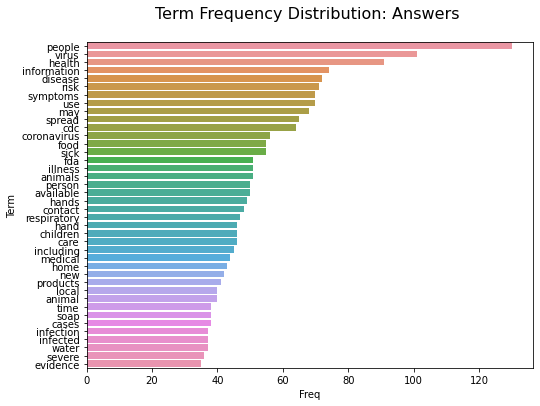

In [55]:
fdist = FreqDist(a_tokens)
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Term', 'Freq']
ordered = fdist_df.sort_values('Freq', ascending=False)
filter_a = ordered[ordered['Freq'] >= 35]

# filtered.plot(x='Term', y='Freq', kind='barh')
plt.figure(figsize=(8,6));
sns.barplot(data=filter_a, x='Freq', y='Term');
plt.title('Term Frequency Distribution: Answers \n', fontsize=16);

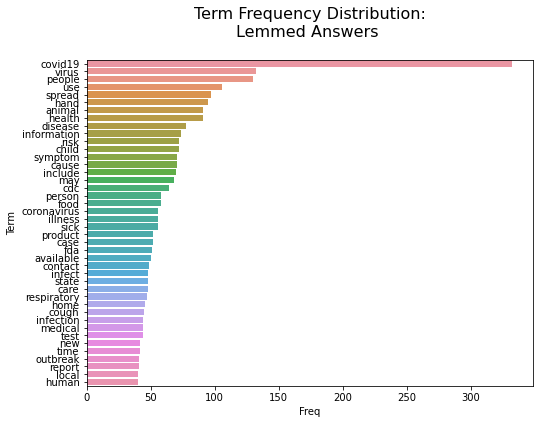

In [65]:
fdist = FreqDist(a_lemm_tokens)
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Term', 'Freq']
ordered = fdist_df.sort_values('Freq', ascending=False)
filter_a_lemm = ordered[ordered['Freq'] >= 40]

# filtered.plot(x='Term', y='Freq', kind='barh')
plt.figure(figsize=(8,6));
sns.barplot(data=filter_a_lemm, x='Freq', y='Term');
plt.title('Term Frequency Distribution:\nLemmed Answers \n', fontsize=16);

##Lastly, our word clouds. At this point, it is merely confirming things we already know, but you know the ond saying: Measure twice, cut once.

##Something very interesting is happening in our answer section. The non-lemmed cloud is repeating words. Now we know there is something going on under the hood that could use a little more digging if we ever decide to enhance the bot to choose its own answers.

##That said, it looks like the best way to deploy our bot is going to be allowing it to match questions and answers. The user will input a question, and the bot will conduct similarity scores to select the question it is most like from our databank. Then, it will return that answer.

##There is certainly more we can do, but in a situation like a pandemic it is better to get something out there people can use right now and develop greater levels of functionality later.

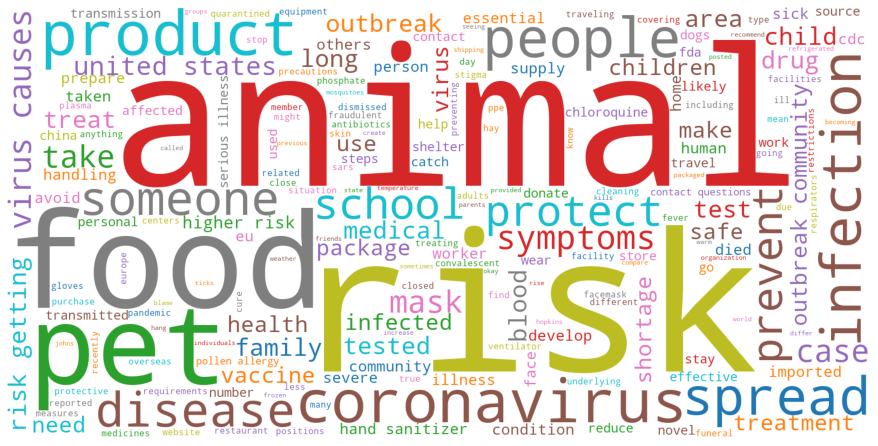

In [67]:
word_cloud(q_string)

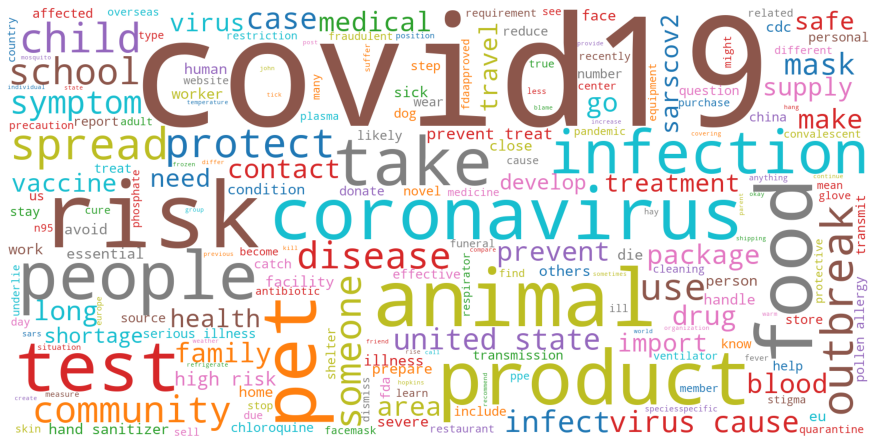

In [68]:
word_cloud(q_string_lemm)

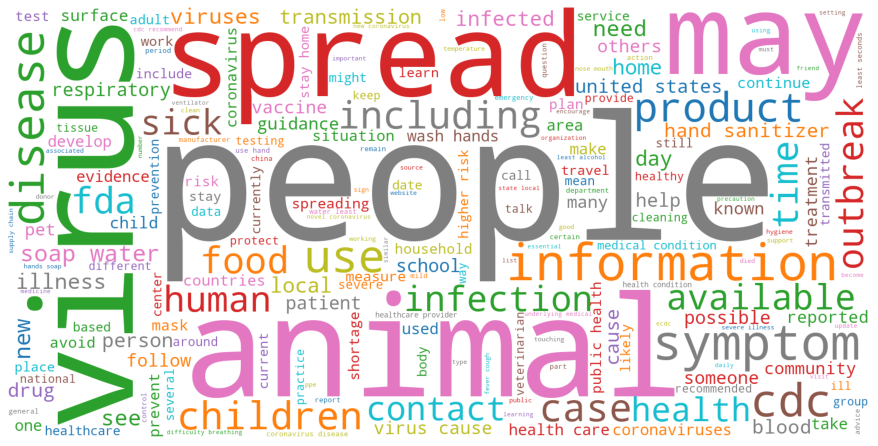

In [69]:
word_cloud(a_string)

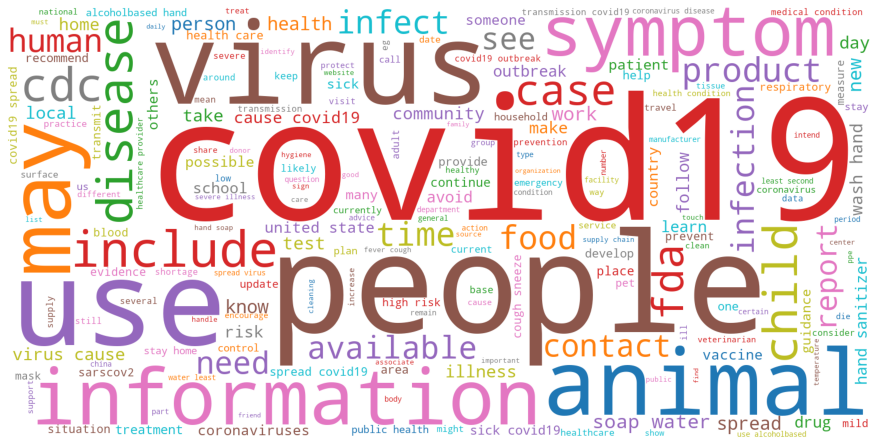

In [70]:
word_cloud(a_string_lemm)

here lie the bones of various things i did to try and figure out code i was trying to make work...

In [0]:
mystring = ['This is a string', 'and this is another string']
print(len(mystring))
for string in mystring:
  print(len(string))

total = []
for string in mystring:
  characters = len(string)
  total.append(characters)
print(sum(total))

In [0]:
sum([len(question) for question in question_list])

In [0]:
single_string = " ".join(question_list)

In [0]:
len(set(single_string.split()))